In [8]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR 
from sklearn.metrics import mean_squared_error 

In [9]:
emp1=pd.ExcelFile(r'C:\Users\LG\Desktop\Yungun\최소주파수\Resulttimevar0_1_data.xlsx')
dataset=emp1.parse('Sheet1')
dataset

,Metro,Yungnam,Chungnam,Honam,Gangwon,Inertia,Fre1,Fre2,Fre3,Fre4,...,Fre91,Fre92,Fre93,Fre94,Fre95,Fre96,Fre97,Fre98,Fre99,Fre100
0,230,2048,114,4107,266,87639.24219,59.999931,59.999779,59.999407,59.998787,...,59.506284,59.504380,59.502993,59.503199,59.503415,59.503497,59.502472,59.500571,59.496524,59.492106
1,451,2880,963,2430,951,86588.24219,60.000000,59.999858,59.999494,59.998843,...,59.487718,59.486155,59.486053,59.485549,59.484866,59.483653,59.481523,59.477929,59.473460,59.468756
2,374,1628,548,3473,547,87639.24219,59.999916,59.999743,59.999341,59.998661,...,59.489833,59.488649,59.488155,59.488026,59.488272,59.487895,59.485169,59.481775,59.477293,59.472630
3,753,468,443,1176,767,91266.25000,59.999974,59.999904,59.999743,59.999457,...,59.711995,59.712594,59.711281,59.708362,59.704555,59.700741,59.697898,59.697073,59.698948,59.701419
4,697,2883,375,2368,137,87639.24219,59.999919,59.999744,59.999308,59.998638,...,59.466373,59.465559,59.465075,59.464856,59.464164,59.461922,59.457765,59.453585,59.447803,59.443785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,431,348,803,4337,843,87639.24219,59.999935,59.999793,59.999455,59.998862,...,59.561864,59.558827,59.555210,59.554247,59.554101,59.554710,59.556509,59.557984,59.557902,59.555911
1108,131,249,236,1336,1224,91266.25000,59.999956,59.999858,59.999604,59.999221,...,59.663709,59.662374,59.658647,59.656074,59.651443,59.649817,59.648480,59.648869,59.651940,59.655448
1109,414,712,49,1250,456,91266.25000,59.999936,59.999806,59.999505,59.998976,...,59.592312,59.587273,59.584511,59.582980,59.582571,59.585237,59.587388,59.590083,59.592499,59.591629
1110,322,1148,555,1057,1322,89745.25000,59.999932,59.999793,59.999454,59.998943,...,59.560221,59.556646,59.554326,59.552897,59.553062,59.555845,59.556968,59.559440,59.558476,59.557575


In [10]:
train_dataset = dataset.sample(frac=0.8,random_state=0) #80퍼센트 정보를 랜덤하게 가져옴
test_dataset = dataset.drop(train_dataset.index)

In [11]:
train_stats = dataset.describe()
for i in range(1,101):
    train_stats.pop("Fre%d"%i)
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Metro,1112.0,455.357914,265.880524,0.00000,216.00000,451.00000,688.00,910.00000
Yungnam,1112.0,1746.698741,1005.627859,2.00000,892.25000,1705.50000,2625.00,3570.00000
Chungnam,1112.0,488.699640,290.524331,1.00000,231.75000,499.00000,737.50,1000.00000
Honam,1112.0,2143.753597,1195.810937,13.00000,1149.25000,2073.00000,3134.75,4348.00000
Gangwon,1112.0,700.860612,397.601804,0.00000,366.75000,711.00000,1031.00,1400.00000
Inertia,1112.0,89048.713040,1511.947382,84488.24219,87639.24219,88694.24219,89745.25,93832.26563


In [12]:
train_out = train_dataset.copy()
test_out= test_dataset.copy()

In [13]:
train_out.pop('Metro') 
train_out.pop('Yungnam')
train_out.pop('Chungnam')
train_out.pop('Honam')
train_out.pop('Gangwon')
train_out.pop('Inertia')
train_out

,Fre1,Fre2,Fre3,Fre4,Fre5,Fre6,Fre7,Fre8,Fre9,Fre10,...,Fre91,Fre92,Fre93,Fre94,Fre95,Fre96,Fre97,Fre98,Fre99,Fre100
795,59.999940,59.999803,59.999486,59.998912,59.998142,59.996986,59.995586,59.993730,59.991754,59.989485,...,59.542996,59.539869,59.538275,59.538087,59.539151,59.540715,59.541693,59.541033,59.539318,59.536391
512,59.999977,59.999901,59.999723,59.999421,59.998940,59.998295,59.997397,59.996238,59.994888,59.993429,...,59.737220,59.733521,59.728578,59.723424,59.719165,59.716712,59.716565,59.718593,59.722040,59.725751
186,59.999949,59.999829,59.999554,59.999045,59.998366,59.997339,59.996084,59.994404,59.992588,59.990478,...,59.579435,59.575663,59.573129,59.571488,59.572704,59.574092,59.576916,59.577957,59.578149,59.576720
1097,59.999917,59.999755,59.999377,59.998795,59.997905,59.996699,59.995189,59.993447,59.991312,59.988561,...,59.522761,59.521051,59.520469,59.520574,59.521355,59.522294,59.522557,59.521213,59.517688,59.513276
747,59.999946,59.999818,59.999521,59.998997,59.998279,59.997207,59.995893,59.994143,59.992249,59.990063,...,59.547426,59.543929,59.542137,59.541903,59.542837,59.544273,59.545525,59.545672,59.544022,59.540524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,59.999947,59.999820,59.999517,59.999002,59.998199,59.997174,59.995715,59.994039,59.991954,59.989882,...,59.550447,59.547037,59.545489,59.545650,59.546625,59.547955,59.549071,59.549049,59.547299,59.543899
217,59.999956,59.999841,59.999573,59.999113,59.998378,59.997446,59.996113,59.994573,59.992649,59.990724,...,59.573512,59.568987,59.566300,59.565542,59.566647,59.568798,59.571129,59.572466,59.572173,59.569349
539,59.999952,59.999833,59.999544,59.999092,59.998406,59.997411,59.996178,59.994520,59.992705,59.990587,...,59.564127,59.560876,59.558127,59.557554,59.558648,59.560208,59.561751,59.562433,59.561689,59.559126
981,59.999947,59.999827,59.999547,59.999031,59.998341,59.997299,59.996028,59.994331,59.992507,59.990393,...,59.580756,59.576331,59.573166,59.572294,59.572455,59.574494,59.576754,59.577983,59.578635,59.577192


In [14]:
test_out.pop('Metro') 
test_out.pop('Yungnam')
test_out.pop('Chungnam')
test_out.pop('Honam')
test_out.pop('Gangwon')
test_out.pop('Inertia')
test_out

,Fre1,Fre2,Fre3,Fre4,Fre5,Fre6,Fre7,Fre8,Fre9,Fre10,...,Fre91,Fre92,Fre93,Fre94,Fre95,Fre96,Fre97,Fre98,Fre99,Fre100
11,59.999939,59.999806,59.999464,59.998935,59.998182,59.997051,59.995680,59.993860,59.991920,59.989688,...,59.556494,59.552855,59.550588,59.549876,59.550670,59.552325,59.553951,59.554811,59.554041,59.550784
19,59.999933,59.999795,59.999458,59.998947,59.998123,59.997088,59.995710,59.993995,59.992242,59.990258,...,59.565600,59.561066,59.557249,59.555394,59.556200,59.557687,59.559095,59.561860,59.561240,59.560783
23,59.999971,59.999880,59.999660,59.999280,59.998672,59.997864,59.996807,59.995514,59.993950,59.992175,...,59.724529,59.719367,59.713915,59.709330,59.706592,59.706252,59.708217,59.711725,59.715576,59.718472
24,59.999934,59.999792,59.999436,59.998897,59.998023,59.996917,59.995380,59.993660,59.991614,59.989706,...,59.555854,59.551461,59.548526,59.547416,59.547847,59.549205,59.550692,59.551391,59.550739,59.548978
25,59.999929,59.999796,59.999509,59.999014,59.998315,59.997294,59.996058,59.994405,59.992638,59.990575,...,59.598920,59.593774,59.589318,59.586505,59.585948,59.587954,59.590959,59.591925,59.592684,59.593456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,59.999948,59.999826,59.999540,59.999039,59.998282,59.997299,59.995903,59.994293,59.992284,59.990281,...,59.559457,59.556081,59.554272,59.554529,59.555746,59.557415,59.559305,59.559301,59.558053,59.554317
1094,59.999948,59.999826,59.999538,59.999017,59.998312,59.997250,59.995953,59.994217,59.992345,59.990170,...,59.562805,59.559112,59.557444,59.557471,59.558284,59.560650,59.561842,59.562653,59.561279,59.557839
1098,59.999945,59.999814,59.999465,59.998954,59.998106,59.997024,59.995501,59.993767,59.991636,59.989550,...,59.544242,59.541011,59.539563,59.539617,59.540357,59.541628,59.542495,59.542254,59.540204,59.536547
1101,59.999978,59.999915,59.999773,59.999535,59.999176,59.998662,59.997937,59.996962,59.995683,59.994253,...,59.721490,59.721815,59.724840,59.719959,59.718463,59.717001,59.713186,59.709900,59.708884,59.710103


In [15]:
train_input = train_dataset.copy()
test_input = test_dataset.copy()

In [16]:
for i in range(1,101):
    train_input.pop('Fre%d'%i)
train_input

for i in range(1,101):
    test_input.pop('Fre%d'%i)
test_input


,Metro,Yungnam,Chungnam,Honam,Gangwon,Inertia
11,879,2116,687,2759,440,87639.24219
19,849,473,557,2107,471,89745.25000
23,107,3405,960,4334,708,85540.25000
24,427,187,337,3729,957,88694.24219
25,124,3058,541,4311,1256,85540.25000
...,...,...,...,...,...,...
1090,237,2919,255,2475,1115,87639.24219
1094,422,2678,46,2520,1301,87639.24219
1098,344,1980,79,4140,384,87639.24219
1101,531,1192,679,558,807,91266.25000


In [17]:
test_input

,Metro,Yungnam,Chungnam,Honam,Gangwon,Inertia
11,879,2116,687,2759,440,87639.24219
19,849,473,557,2107,471,89745.25000
23,107,3405,960,4334,708,85540.25000
24,427,187,337,3729,957,88694.24219
25,124,3058,541,4311,1256,85540.25000
...,...,...,...,...,...,...
1090,237,2919,255,2475,1115,87639.24219
1094,422,2678,46,2520,1301,87639.24219
1098,344,1980,79,4140,384,87639.24219
1101,531,1192,679,558,807,91266.25000


In [37]:
from openpyxl import Workbook  
import openpyxl   

test_input.to_excel('proposed.xlsx')


In [19]:
from numpy import absolute
from numpy import mean
from numpy import std

from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor

from sklearn.multioutput import RegressorChain
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR

In [20]:
model1 = LinearRegression()
model2 = KNeighborsRegressor()
model3 = RandomForestRegressor()
model4 = DecisionTreeRegressor()


model1.fit(train_input, train_out)
model2.fit(train_input, train_out)
model3.fit(train_input, train_out)
model4.fit(train_input, train_out)


cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores1 = cross_val_score(model1, train_input, train_out, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

n_scores2 = cross_val_score(model2, train_input, train_out, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
n_scores3 = cross_val_score(model3, train_input, train_out, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
n_scores4 = cross_val_score(model4, train_input, train_out, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# summarize performance
n_scores1 = absolute(n_scores1)
n_scores2 = absolute(n_scores2)
n_scores3 = absolute(n_scores3)
n_scores4 = absolute(n_scores4)

print('Result: %.4f (%.4f)' % (mean(n_scores1), std(n_scores1)))

print('Result: %.4f (%.4f)' % (mean(n_scores2), std(n_scores2)))

print('Result: %.4f (%.4f)' % (mean(n_scores3), std(n_scores3)))

print('Result: %.4f (%.4f)' % (mean(n_scores4), std(n_scores4)))

Result: 0.0117 (0.0009)
Result: 0.0291 (0.0022)
Result: 0.0304 (0.0022)
Result: 0.0402 (0.0025)


In [38]:
data_in = [[131,249, 236, 1336, 1224, 91266.25000]]
yhat1 = model1.predict(data_in)
yhat2 = model2.predict(data_in)
yhat3 = model3.predict(data_in)
yhat4 = model4.predict(data_in)
# summarize prediction


In [34]:
yhat4 = yhat4.transpose()

In [35]:
import xlsxwriter

workbook = xlsxwriter.Workbook('bin.xlsx')
worksheet = workbook.add_worksheet()

row = 0

for col, data in enumerate(yhat4):
    worksheet.write_column(row, col, data)

workbook.close()


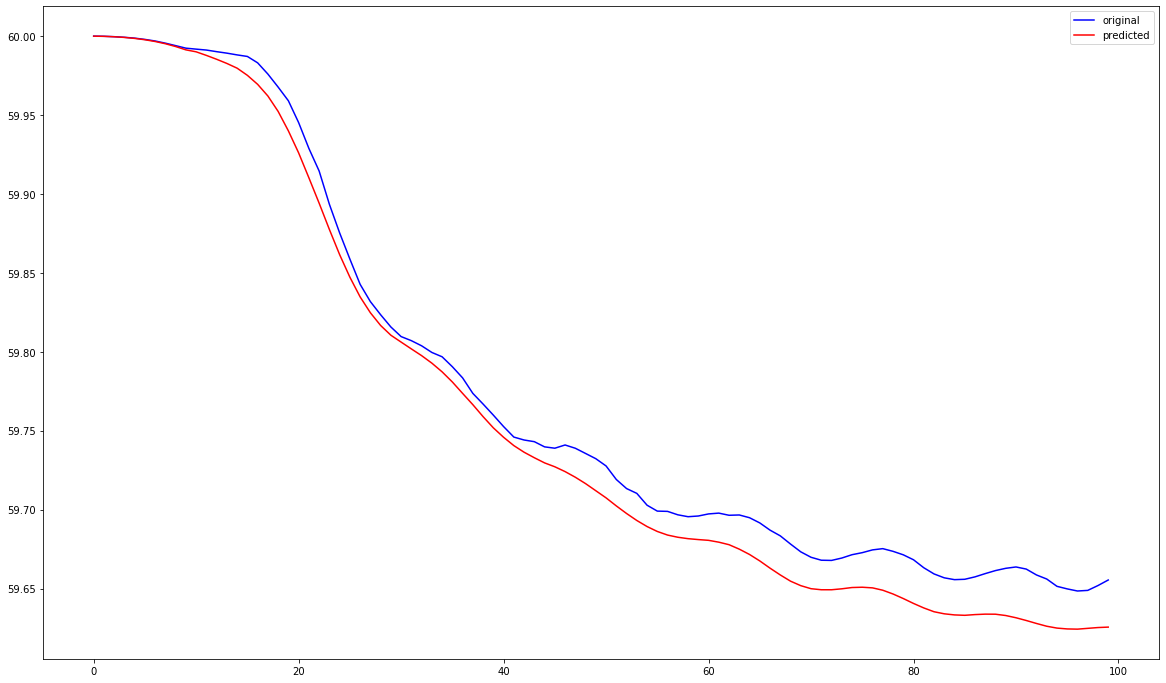

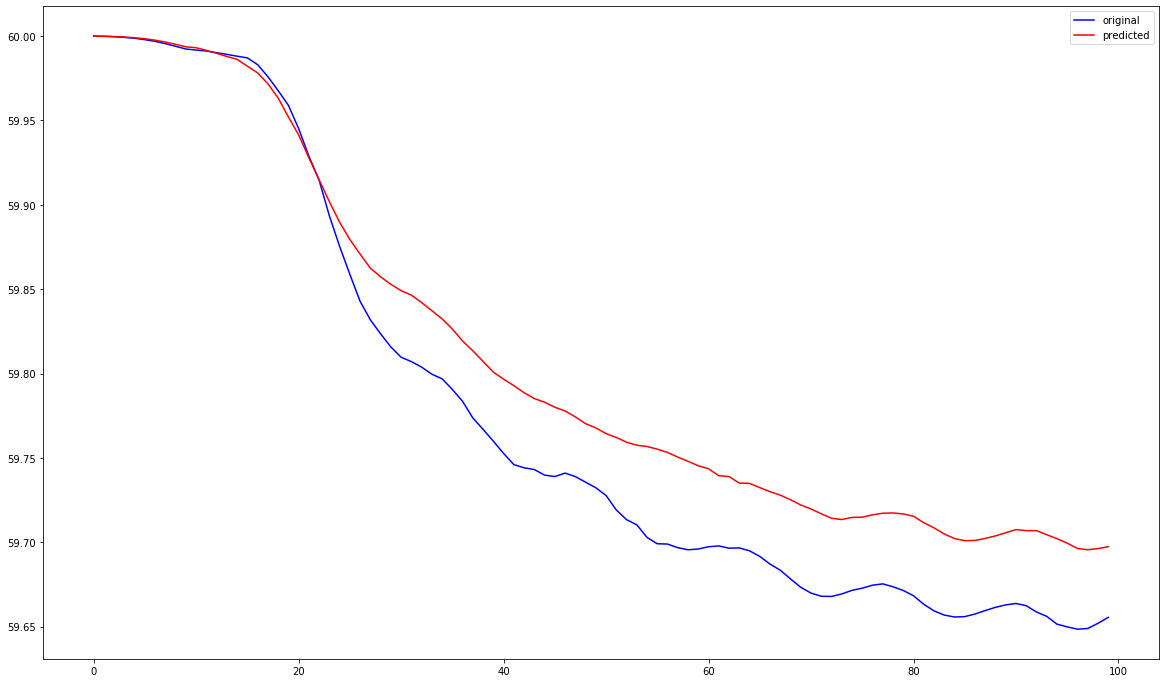

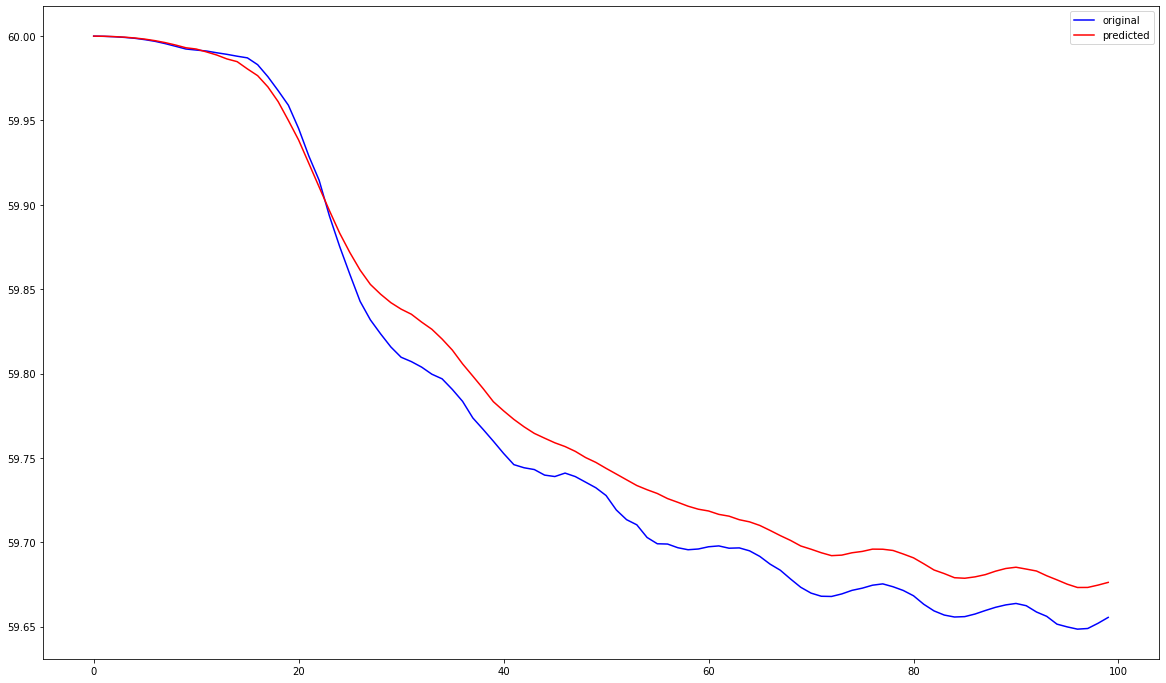

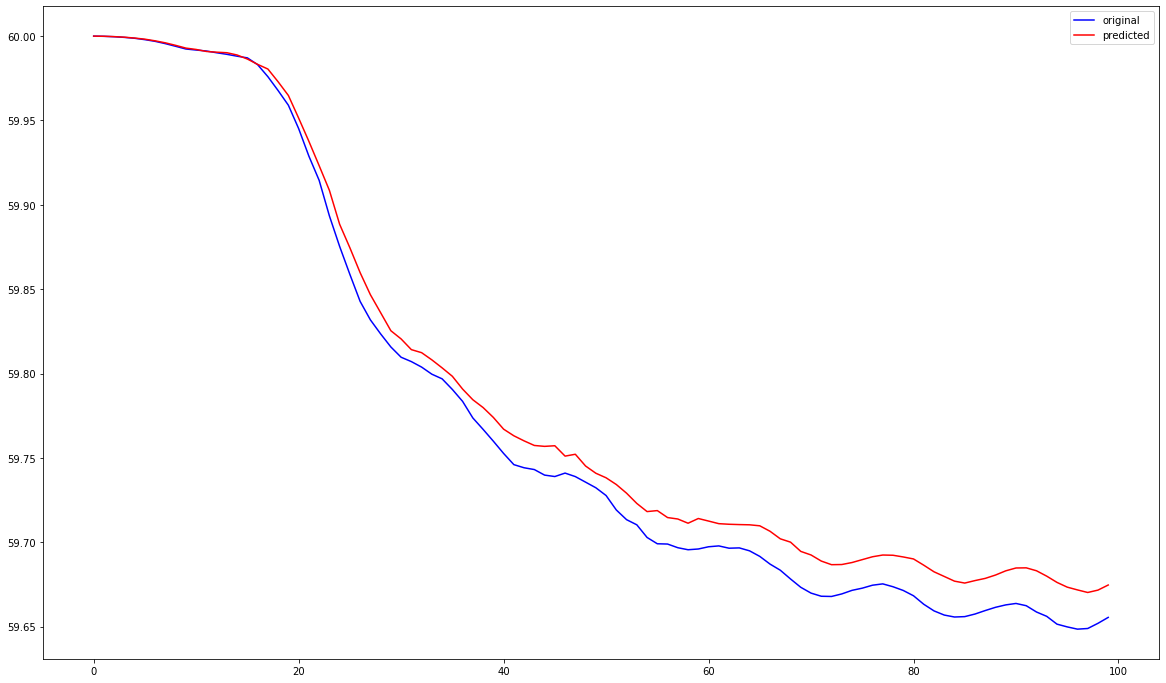

In [39]:
x_ax=range(100)
plt.figure(figsize=(20,12))
plt.plot(x_ax, test_out[221:222].transpose(), color="blue", label="original")
plt.plot(x_ax, yhat1.transpose(), lw=1.5, color="red", label="predicted")
plt.legend()
plt.show() 

x_ax=range(100)
plt.figure(figsize=(20,12))
plt.plot(x_ax, test_out[221:222].transpose(), color="blue", label="original")
plt.plot(x_ax, yhat2.transpose(), lw=1.5, color="red", label="predicted")
plt.legend()
plt.show() 

x_ax=range(100)
plt.figure(figsize=(20,12))
plt.plot(x_ax, test_out[221:222].transpose(), color="blue", label="original")
plt.plot(x_ax, yhat3.transpose(), lw=1.5, color="red", label="predicted")
plt.legend()
plt.show() 

x_ax=range(100)
plt.figure(figsize=(20,12))
plt.plot(x_ax, test_out[221:222].transpose(), color="blue", label="original")
plt.plot(x_ax, yhat4.transpose(), lw=1.5, color="red", label="predicted")
plt.legend()
plt.show() 